In [21]:
from env import host, username, password
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import acquire as ac
import prepare as prep
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score

In [33]:
iris_docs = data('iris', show_doc = True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [31]:
iris_df = ac.get_iris_data()
print(f'The first 3 rows are...\n {iris_df.head(3)}')

The first 3 rows are...
    species_id  measurement_id  sepal_length  sepal_width  petal_length  \
0           1               1           5.1          3.5           1.4   
1           1               2           4.9          3.0           1.4   
2           1               3           4.7          3.2           1.3   

   petal_width species_name  
0          0.2       setosa  
1          0.2       setosa  
2          0.2       setosa  


In [11]:
shape = iris_df.shape
print(f'There are {shape[0]} rows and {shape[1]} columns')

there are 150 rows and 5 columns


In [22]:
keys = iris_df.keys()
print(f'The columns are: {list(keys)}')

The columns are: ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']


In [30]:
dtypes = iris_df.info()
print(dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [34]:
iris_df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


I would not rescale since all units are in cm

In [96]:
df_excel = pd.read_excel('mytable_customer_details.xlsx')
df_excel_sample = pd.read_excel('mytable_customer_details.xlsx').head(100)

In [48]:
rows = df_excel.shape
print(f'There are {rows[0]} rows in the original dataframe')

There are 7049 rows in the original dataframe


In [58]:
keys = list(df_excel.keys())
print(f'The first five columnns are: {keys[0]} , {keys[1]} , {keys[2]} , {keys[3]} , {keys[4]}')

The first five columnns are: customer_id , gender , is_senior_citizen , partner , dependents


In [62]:
excel_dtypes = df_excel.dtypes

In [87]:
excel_dtypes[excel_dtypes.values == 'object']

customer_id      object
gender           object
partner          object
dependents       object
payment_type     object
churn            object
avg_charges      object
Phone desc       object
contract type    object
internet desc    object
dtype: object

In [85]:
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000,7049.000000,7049.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883,32.379866,1.083416
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984,24.595524,1.226883
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500,8.733456,0.000000
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000,28.683425,1.000000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000,55.229399,2.000000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,79.341772,3.000000


In [94]:
tenure_range = (df_excel.tenure.max()) - (df_excel.tenure.min())
print(f' The range of tenure is {tenure_range:.2f}')

 The range of tenure is 79.34


In [95]:
monthly_charges_range = (df_excel.monthly_charges.max()) - (df_excel.monthly_charges.min())
print(f'The range of monthly charges is {monthly_charges_range:.2f}')

The range of monthly cahrges is 100.50


In [97]:
total_charges_range = (df_excel.total_charges.max()) -(df_excel.total_charges.min())
print(f'The range of total charges is {total_charges_range:.2f}')

The range of total charges is 8666.00


In [10]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing'    
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv&gid=341089357')

In [12]:
train_df = pd.read_csv(csv_url)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [14]:
shape = train_df.shape
print(f'the dataset has {shape[0]} rows and {shape[1]} columns')

the dataset has 891 rows and 12 columns


In [15]:
keys = train_df.keys()
print(f'The column names are {list(keys)}' )

The column names are ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
unique_sex = list(train_df.Sex.unique())
unique_sex

['male', 'female']

In [30]:
embarked = list(train_df.Embarked.unique())
embarked

['S', 'C', 'Q', nan]

## Exercises

The end product of this exercise should be the specified functions in a python script named `prepare.py`.
Do these in your `classification_exercises.ipynb` first, then transfer to the prepare.py file. 

This work should all be saved in your local `classification-exercises` repo. Then add, commit, and push your changes.

Using the Iris Data:  

1. Use the function defined in `acquire.py` to load the iris data.  

1. Drop the `species_id` and `measurement_id` columns.  

1. Rename the `species_name` column to just `species`.  

1. Create dummy variables of the species name. 

1. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.  

In [32]:
iris_df = ac.get_iris_data()

In [6]:
iris_df = iris_df.drop(columns = ['species_id', 'measurement_id'])

In [16]:
iris_df = iris_df.rename(columns = {'species_name':'species'})
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [20]:
iris_df = pd.get_dummies(data = iris_df, columns = ['species'], drop_first=True)

In [21]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


In [34]:
def prep_iris(iris_df):
    '''
    Takes in the iris_df, drops species id, and measurement id, then adds a dummy
    variable column. It then returns the iris_df cleaned as iris_df
    '''
    iris_df = iris_df.drop(columns = ['species_id', 'measurement_id'])
    iris_df = iris_df.rename(columns = {'species_name':'species'})
    iris_df = pd.get_dummies(data = iris_df, columns = ['species'], drop_first=True)
    return iris_df
    

In [35]:
iris_df = prep_iris(iris_df)

In [36]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


# Explore Exercises
  #### 1. Acquire, prepare & split your data.

In [60]:
df_iris = ac.get_iris_data()
df_iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [61]:
df_iris = prep.prep_iris(df_iris)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
train, validate, test = prep.train_validate_test_split(df_iris, 'species')
print(train.info())
print(validate.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 134 to 124
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  36 non-null     float64
 1   sepal_width   36 non-null     float64
 2   petal_length  36 non-null     float64
 3   petal_width   36 non-null     float64
 4   species       36 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 80 to 65
Data 

#### 2. Univariate Stats

    - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

    - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

    - Document takeaways & any actions.

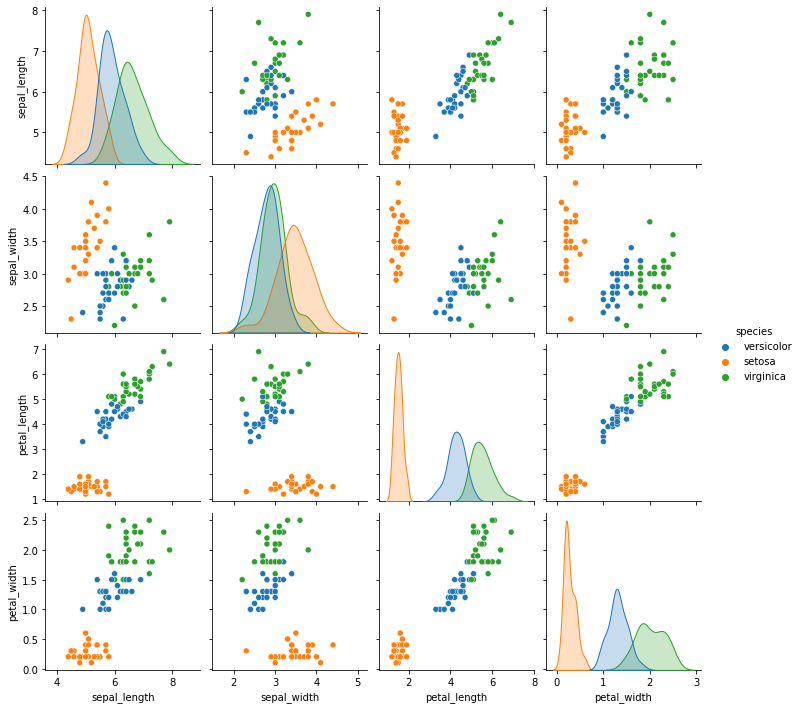

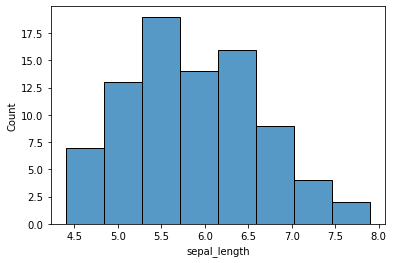

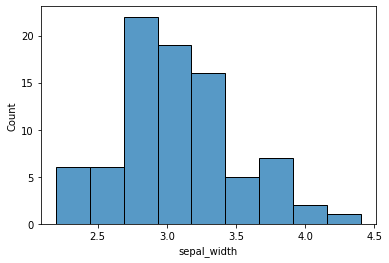

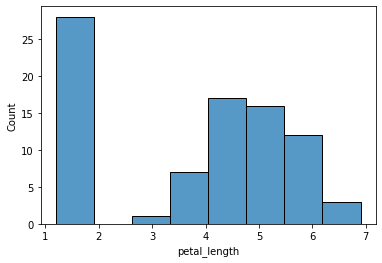

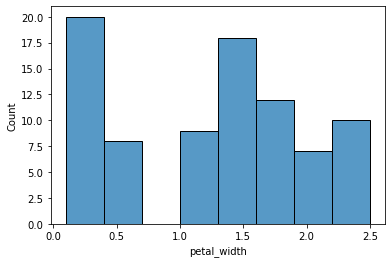

In [81]:
plt.show(sns.pairplot(train, hue = 'species'))
plt.show(sns.histplot(train['sepal_length']))
plt.show(sns.histplot(train['sepal_width']))
plt.show(sns.histplot(train['petal_length']))
plt.show(sns.histplot(train['petal_width']))

<AxesSubplot:>

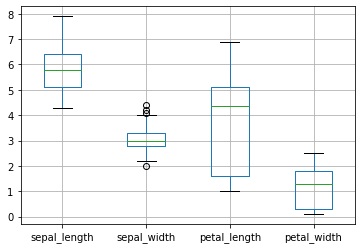

In [12]:
df_iris.boxplot()

In [82]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='species', ylabel='count'>

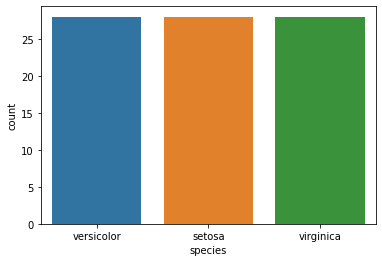

In [83]:
sns.countplot(x = train['species'])

In [84]:
pd.crosstab(train['species'], columns = 'count').reset_index()

col_0,species,count
0,setosa,28
1,versicolor,28
2,virginica,28


My takeaways & actions:
   - Petal width and petal length seem to be a good way to predict whether or not a species is setosa 
   - Petal width and length seem also able to predict the other two species, but there is more overlap. That overlap will introduce more error into a predictive model. 
   - Petal length and width seem to be skewed to the left, wheras sepal length and width look normal. 

#### 3. Bivariate Stats

    - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

    - For each measurement type, compute the descriptive statistics for each species.

    - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

    - Document takeaways & any actions.

In [86]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


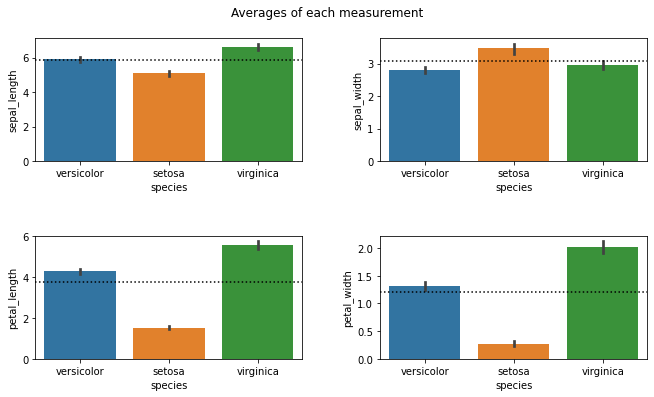

In [87]:
plt.figure(figsize = (10,6))

# sepal_length
plt.subplot(221)
sns.barplot(x = train.species, y = train.sepal_length)
plt.axhline(y = train.sepal_length.mean(), color = 'black', linestyle = ':')

# sepal_width
plt.subplot(222)
sns.barplot(x = train.species, y = train.sepal_width)
plt.axhline(y = train.sepal_width.mean(), color = 'black', linestyle = ':')

# petal_length subplot
plt.subplot(223)
sns.barplot(x = train.species, y = train.petal_length)
plt.axhline(y = train.petal_length.mean(), color = 'black', linestyle = ':')

#petal_width subplot

plt.subplot(224)
sns.barplot(x = train.species, y = train.petal_width)
plt.axhline(y = train.petal_width.mean(), color = 'black', linestyle = ':')

# formatted the layout and gave the figure a name
plt.tight_layout(pad = 4)
plt.suptitle('Averages of each measurement')
plt.show()

In [88]:
train.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.089286    5.896429   6.625000
             std     0.360390    0.425556   0.532378
             min     4.400000    4.900000   5.800000
             25%     4.875000    5.600000   6.300000
             50%     5.000000    5.800000   6.450000
             75%     5.400000    6.125000   6.900000
             max     5.800000    6.900000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.467857    2.796429   2.960714
             std     0.427788    0.280848   0.318956
             min     2.300000    2.300000   2.200000
             25%     3.275000    2.600000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.800000    3.000000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.507143    4.271429   5.535714
             std     0.184448    0.409930   0.496815
             min     1.200000    3.300000   4.800000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.250000   5.500000
             75%     1.600000    4.525000   5.800000
             max     1.900000    5.100000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.275000    1.314286   2.021429
             std     0.120570    0.199470   0.293582
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.400000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [89]:
# created a dataframe of just versicolor flowers
df_vers = train[train['species'] == 'versicolor']

In [90]:
# created a dataframe of just virginica flowers
df_virg = train[train['species'] == 'virginica']

Mann Whitney U test is a non parametric test that test differences of the mean of two groups.
In this case, we will be testing the mean of each measurement taken from the two flowers.
- $H_{0}$: There is no difference between the two means
- $H_{a}$: There is a significant difference between the two means


In [99]:
petal_w = stats.mannwhitneyu(df_virg['petal_width'], df_vers['petal_width'])
petal_w

MannwhitneyuResult(statistic=17.0, pvalue=3.235595834904965e-10)

In [100]:
petal_l = stats.mannwhitneyu(df_virg['petal_length'], df_vers['petal_length'])
petal_l

MannwhitneyuResult(statistic=7.5, pvalue=1.4739917857575313e-10)

In [101]:
sepal_w = stats.mannwhitneyu(df_virg['sepal_width'], df_vers['sepal_width'])
sepal_w

MannwhitneyuResult(statistic=274.0, pvalue=0.026286295699228482)

In [102]:
sepal_l = stats.mannwhitneyu(df_virg['sepal_length'], df_vers['sepal_length'])
sepal_l

MannwhitneyuResult(statistic=107.5, pvalue=1.541014598267054e-06)

My takeaways and actions:
   - all measuremnets' means of virginia and versicolor are significantly different. We could probably use them as features in a classification model

#### Multivariate Stats

   - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

   - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

   - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

   - Document takeaways and any actions.

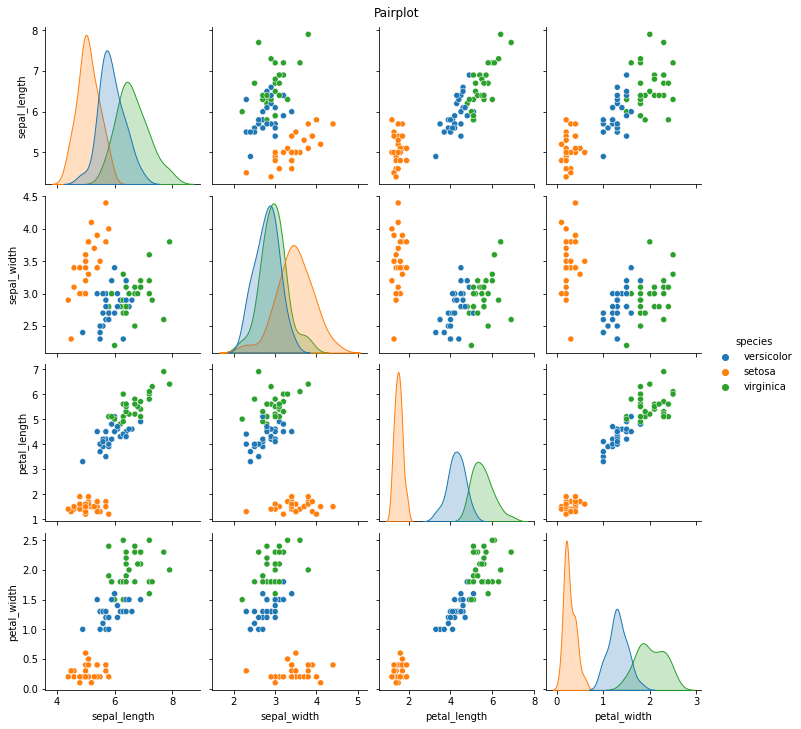

In [119]:
sns.pairplot(train, hue = 'species')
plt.suptitle('Pairplot', y = 1.01)
plt.show()

In [170]:
# create a melted df to put into the swarm plot
train_melt = train.melt(id_vars = 'species')
train_melt

,species,variable,value
0,versicolor,sepal_length,5.70
1,setosa,sepal_length,5.50
2,virginica,sepal_length,6.30
3,versicolor,sepal_length,5.70
4,setosa,sepal_length,5.70
...,...,...,...
415,setosa,sepal_area,16.32
416,versicolor,sepal_area,20.40
417,versicolor,sepal_area,15.96
418,setosa,sepal_area,19.38


<AxesSubplot:xlabel='variable', ylabel='value'>

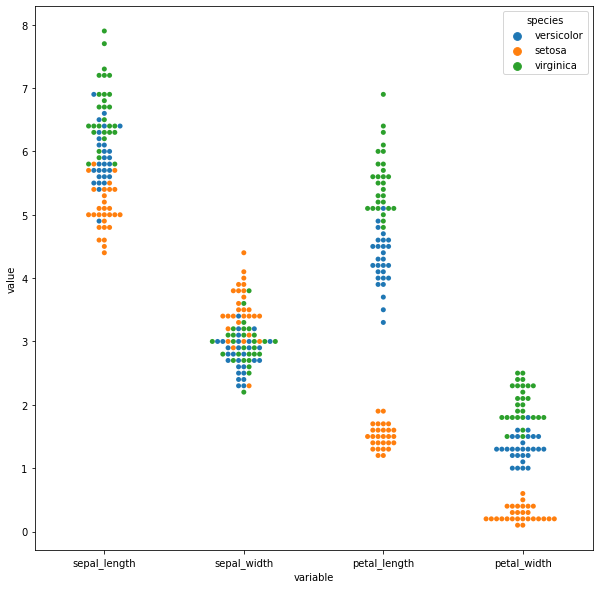

In [134]:
# place it in a figure so that all data can be included. Use hue to seperate by species
plt.figure(figsize = (10,10))
sns.swarmplot(x = train_melt['variable'], y = train_melt['value'], hue = train_melt['species'])

Question to explore: Is sepal area significantly different between virginica and versicolor?

In [153]:
#create df column with sepal area
train['sepal_area'] = train['sepal_width'] * train['sepal_length']
# create one group without setosa to use for barplot
vivers_area = train[train['species'] != 'setosa']
# create df of just virginica
vir_area = train[train['species'] == 'virginica']
#create df of just virginica
vers_area = train[train['species'] == 'versicolor']

<AxesSubplot:xlabel='species', ylabel='sepal_area'>

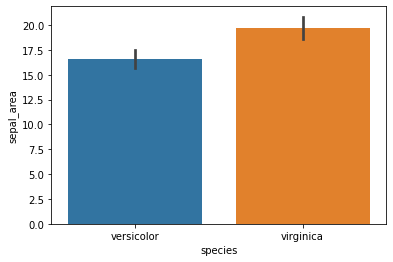

In [151]:
sns.barplot(x = virvers_area['species'], y = virvers_area['sepal_area'])

<p>Since there are two independent categorical variables and one continuous variable, we can compare the means with either a Mann-Whitney U or a Student's ttest. For a student's t, we need to see if the variances are equal and if they are normally distributed. <br>
The null and alternate hypotheses for both a Mann-Whitney and a Student's t are: <br>
- $H_{0}$: There is no difference between the two means<br>
- $H_{a}$: There is a significant difference between the two means <br>
The null and alternate hypotheses for a Shapiro Wilks test are:<br>
- $H_{0}$: The distribution is not different than a normal bell curve<br>
- $H_{a}$: The data is different than a normal bell curve<p>

In [154]:
# use levenes test to check for equal variances. P value is not less than .05, which means the variances are equal
stats.levene(vir_area['sepal_area'],vers_area['sepal_area'])

LeveneResult(statistic=0.8557234913763893, pvalue=0.35905383725781004)

In [155]:
stats.shapiro(vir_area['sepal_area'])

ShapiroResult(statistic=0.9257876873016357, pvalue=0.048319026827812195)

In [156]:
stats.shapiro(vers_area['sepal_area'])

ShapiroResult(statistic=0.9907670617103577, pvalue=0.9957255125045776)

Since there was a significant result with sepal_area, we reject the null. This means that the virginica sepal_area is not normally distributed. Thus, we have to use the non-parametric test, the Mann-Whitney U <br>
I wanted to see if perhaps I could ignore the issue due to the small sample size, so I checked the histogram with kde

<AxesSubplot:xlabel='sepal_area', ylabel='Count'>

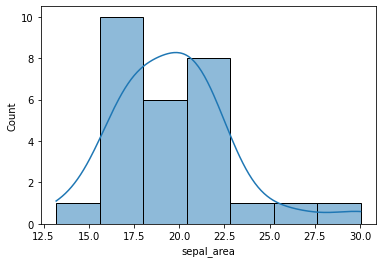

In [165]:
sns.histplot(vir_area['sepal_area'], kde = True)

In [166]:
vir_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 133 to 140
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  28 non-null     float64
 1   sepal_width   28 non-null     float64
 2   petal_length  28 non-null     float64
 3   petal_width   28 non-null     float64
 4   species       28 non-null     object 
 5   sepal_area    28 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.5+ KB


I chose to err on the side of safety and go with the Mann-Whitney test, due to the small sample size and also the wierdness of the skew. 

In [167]:
stats.mannwhitneyu(vir_area['sepal_area'],vers_area['sepal_area'])

MannwhitneyuResult(statistic=166.5, pvalue=0.00011307493229706356)

With a p value of less than .05, we reject the Mann Whitney null. This means that mean sepal_area of versicolor and virginica are significantly different. 

# Decision Tree Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [4]:
df_titanic = ac.get_titanic_data()
df_titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [5]:
df_titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [6]:
train, validate, test = prep.prep_titanic_data(df_titanic)
train.head()

/Users/parkervoit/Desktop/codeup-data-science/classifications-exercises/prepare.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['embark_town']] = imputer.transform(test[['embark_town']])
/Users/parkervoit/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,0,0,9.8375,1,0,0,1
370,1,1,1,0,55.4417,0,1,0,0
573,1,3,0,0,7.7500,1,0,1,0
110,0,1,0,0,52.0000,1,1,0,1
167,0,3,1,4,27.9000,0,0,0,1


In [7]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [31]:
train['baseline'] = 0

In [32]:
baseline_accuracy = (train.baseline == train.survived).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 61.65%


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [176]:
X_cols = ['pclass', 'sex_male', 'alone']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [177]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [178]:
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 81.33%
validate score: 74.30%


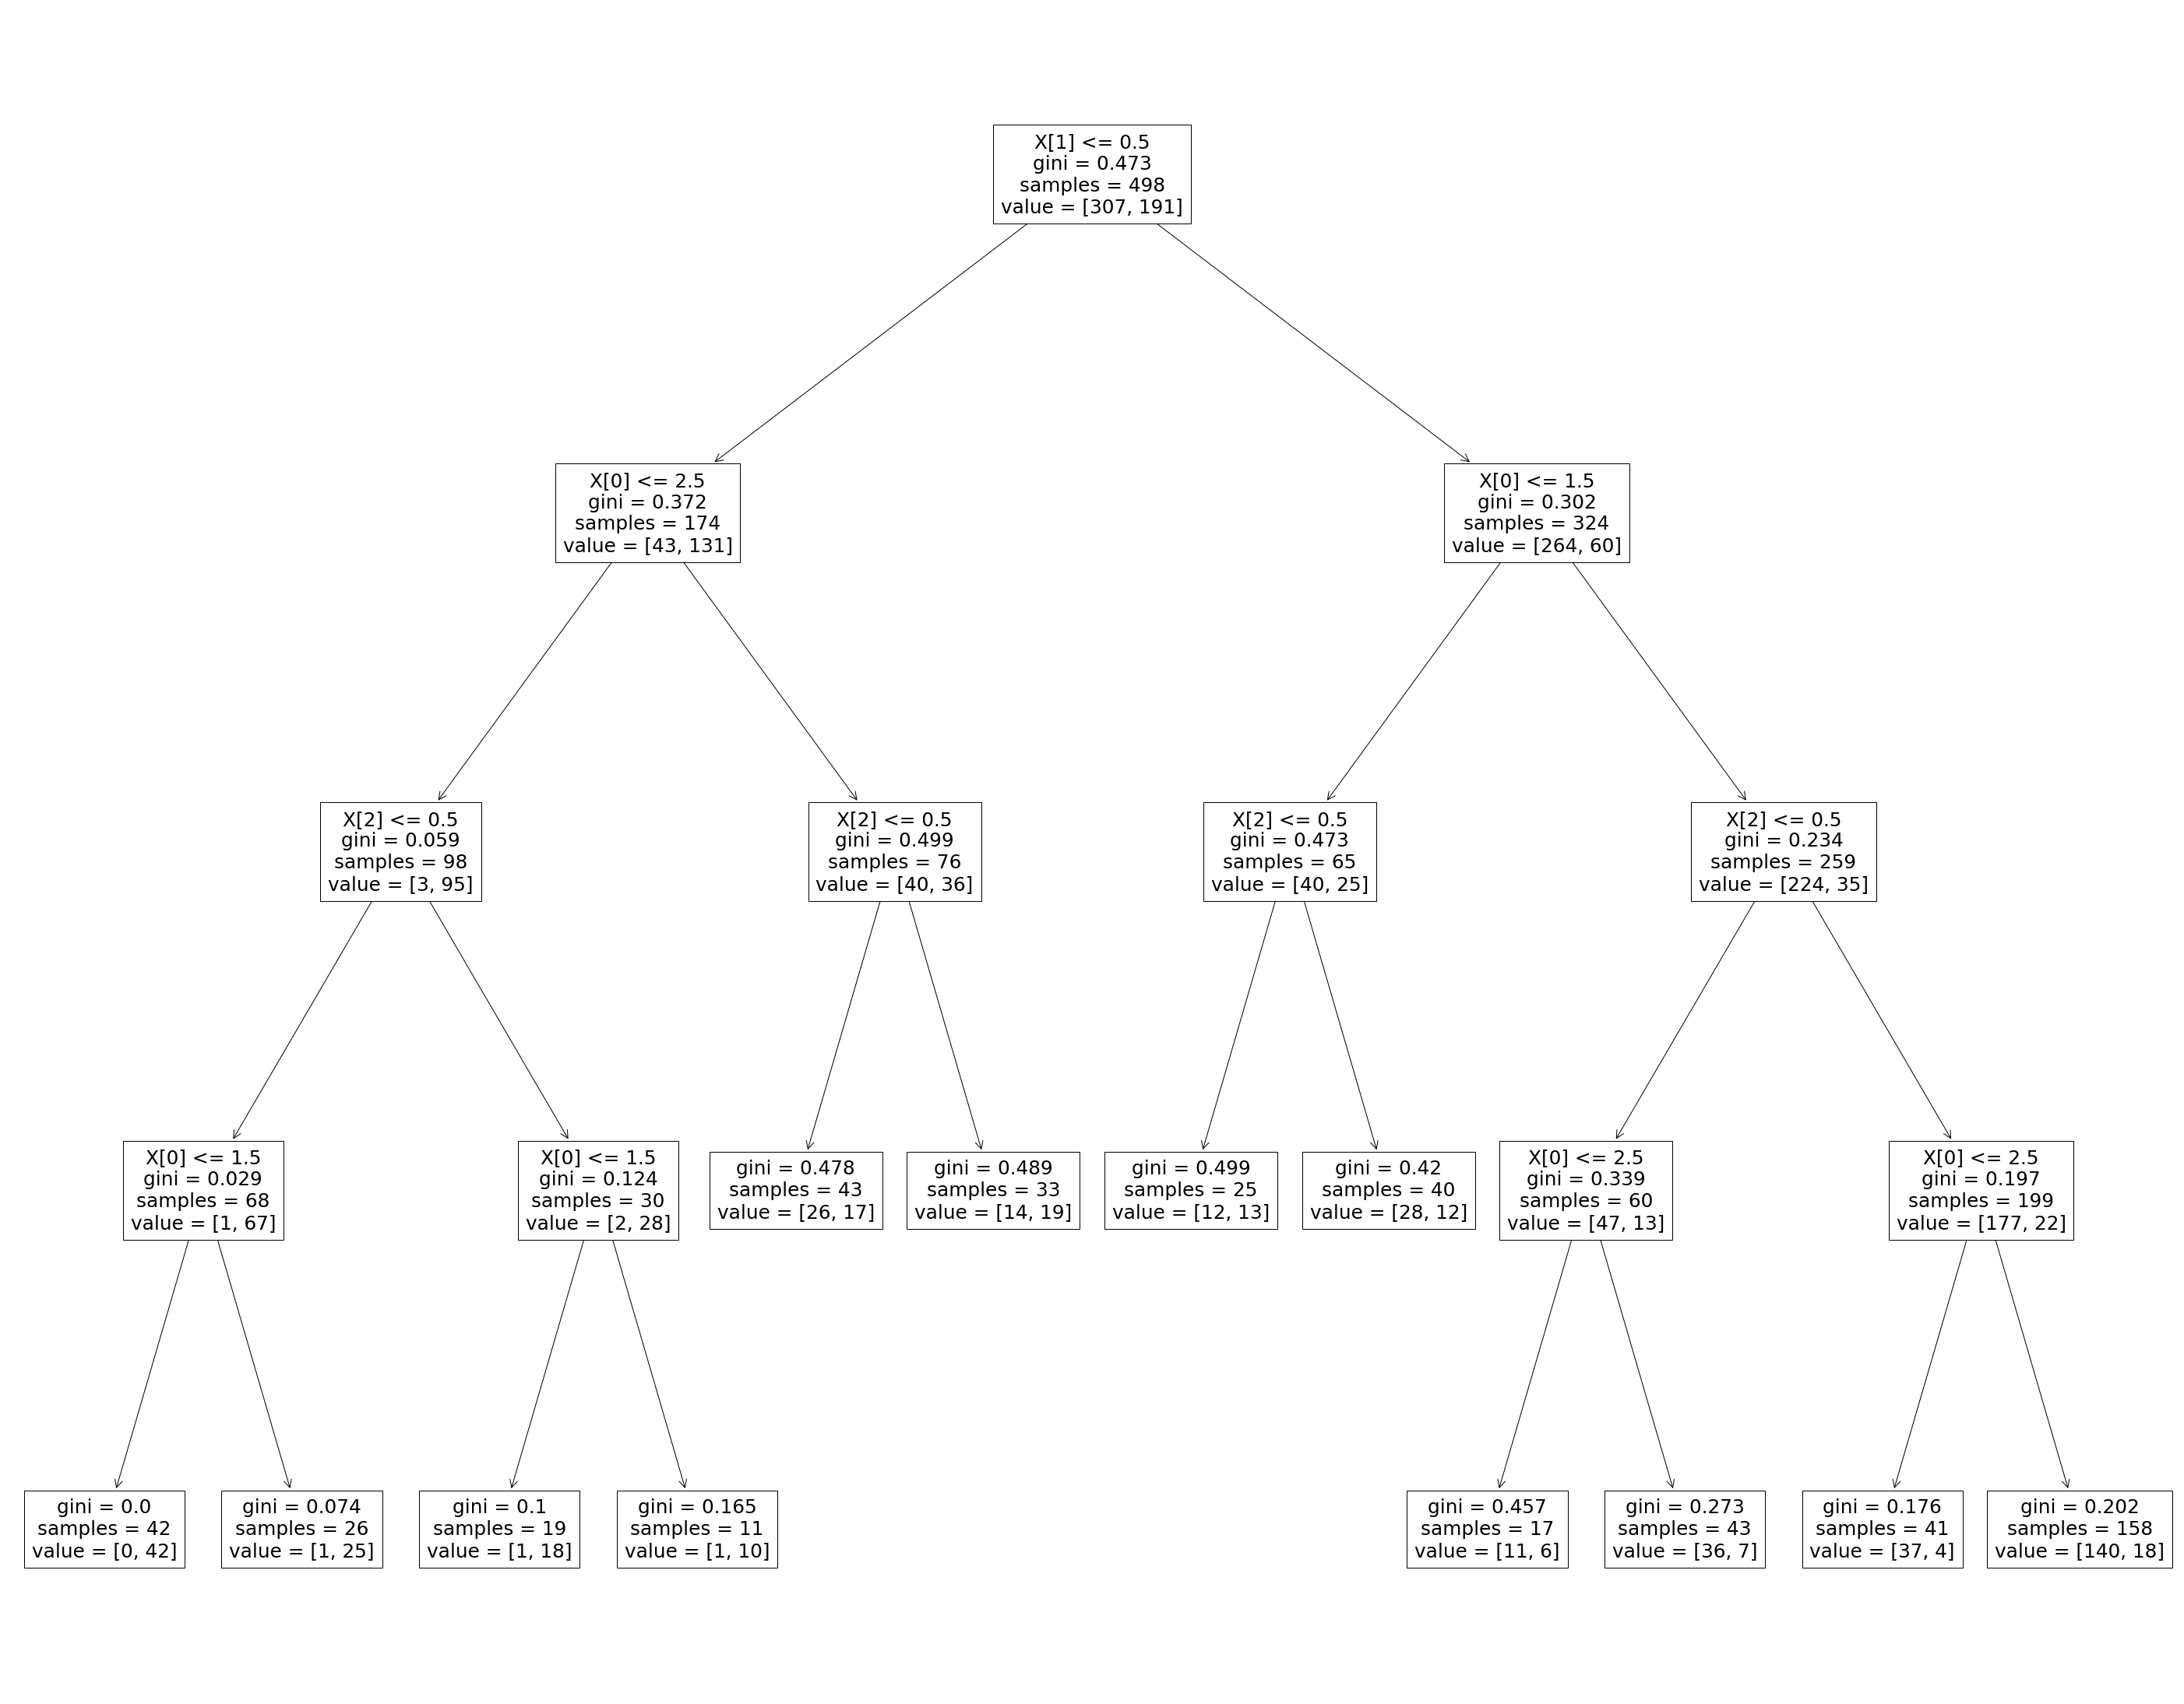

In [179]:
plt.figure(figsize = [50,40])
plt.show(plot_tree(model1))

In [180]:
train['model1_pred'] = model1.predict(X_train)

In [181]:
train

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline,model1_pred
474,0,3,0,0,9.8375,1,0,0,1,0,1
370,1,1,1,0,55.4417,0,1,0,0,0,1
573,1,3,0,0,7.7500,1,0,1,0,0,1
110,0,1,0,0,52.0000,1,1,0,1,0,0
167,0,3,1,4,27.9000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
735,0,3,0,0,16.1000,1,1,0,1,0,0
163,0,3,0,0,8.6625,1,1,0,1,0,0
770,0,3,0,0,9.5000,1,1,0,1,0,0
196,0,3,0,0,7.7500,1,1,1,0,0,0


In [182]:
validate['model1_pred'] = model1.predict(X_validate)
validate

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,model1_pred
569,1,3,0,0,7.8542,1,1,0,1,0
532,0,3,1,1,7.2292,0,1,0,0,0
223,0,3,0,0,7.8958,1,1,0,1,0
35,0,1,1,0,52.0000,0,1,0,1,1
93,0,3,1,2,20.5750,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
91,0,3,0,0,7.8542,1,1,0,1,0
258,1,1,0,0,512.3292,1,0,0,0,1
186,1,3,1,0,15.5000,0,0,1,0,0
108,0,3,0,0,7.8958,1,1,0,1,0


In [183]:
print(classification_report(train.survived, train.model1_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       307
           1       0.81      0.66      0.73       191

    accuracy                           0.81       498
   macro avg       0.81      0.79      0.79       498
weighted avg       0.81      0.81      0.81       498



In [184]:
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [57]:
print(f'Train model is {model1.score(X_train, y_train):.2%}')
print(f'Validate model is {model1.score(X_validate, y_validate):.2%}')

Train model is 81.33%
Validate model is 74.30%


In [68]:
matrix1 = confusion_matrix(train.survived, train.model1_pred)
matrix1

array([[278,  29],
       [ 64, 127]])

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [64]:
print(classification_report(validate.survived, validate.model1_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       132
           1       0.71      0.56      0.63        82

    accuracy                           0.74       214
   macro avg       0.73      0.71      0.72       214
weighted avg       0.74      0.74      0.74       214



In [70]:
val_matrix1 = confusion_matrix(validate.survived, validate.model1_pred)
val_matrix1

array([[113,  19],
       [ 36,  46]])

In [119]:
print(f'Validate model accuracy is {model1.score(X_validate, y_validate):.2%}')

Validate model accuracy is 74.30%


In [120]:
tpr = val_matrix1[1][1] / (val_matrix1[1][1] + val_matrix1[1][0])

In [121]:
print(f'True positive rate is {tpr:.2%}')

True positive rate is 56.10%


In [122]:
fpr = val_matrix1[0,1] / (val_matrix1[0,1] + val_matrix1[0,0])
print(f'False positive rate is {fpr:.2%}')

False positive rate is 14.39%


In [123]:
tnr = val_matrix1[0,0] / (val_matrix1[0,0] + val_matrix1[0,1])
print(f'True negative rate is {tnr:.2%}')

True negative rate is 85.61%


In [124]:
fnr = val_matrix1[1,0] / (val_matrix1[1,1] + val_matrix1[1,0])
print(f'False negative rate is {tnr:.2%}')

False negative rate is 85.61%


### Run through steps 2-4 using a different max_depth value

In [54]:
model2 = DecisionTreeClassifier(max_depth = 2)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

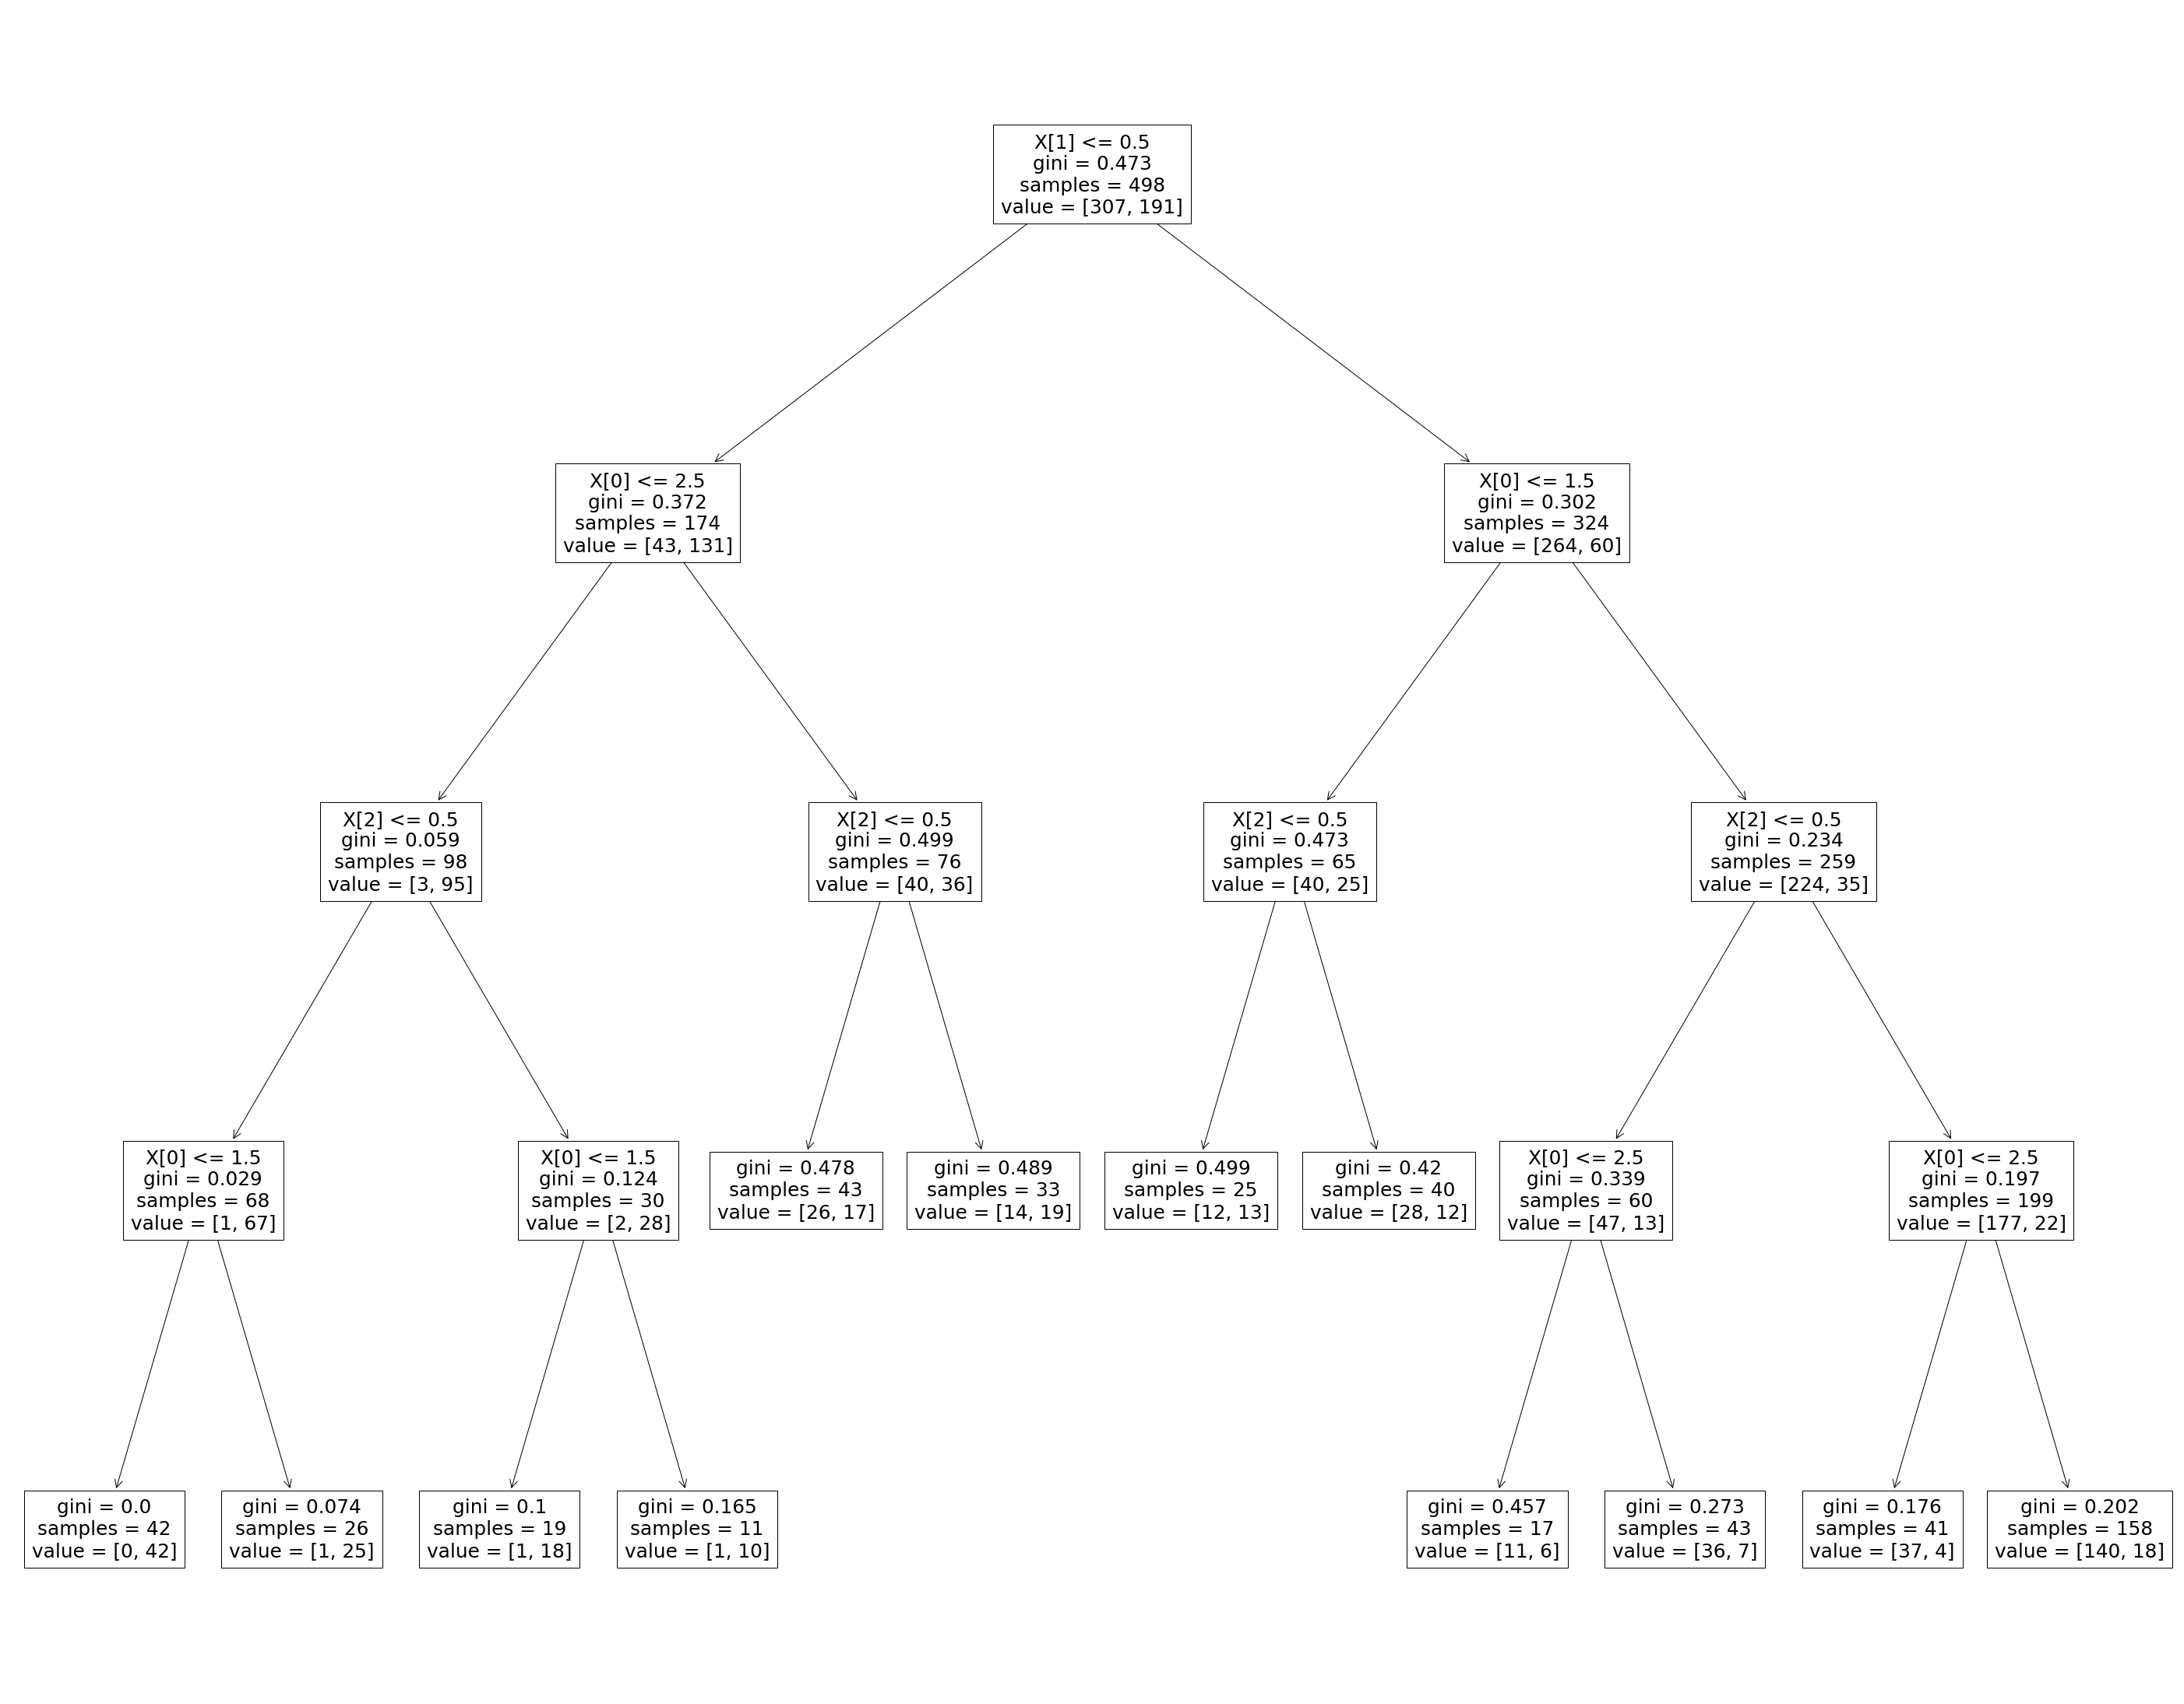

In [53]:
plt.figure(figsize = [50,40])
plt.show(plot_tree(model2))

In [151]:
train['model2_pred'] = model2.predict(X_train)
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,model1_pred,model2_pred
474,0,3,0,0,9.8375,1,0,0,1,1,0
370,1,1,1,0,55.4417,0,1,0,0,1,0
573,1,3,0,0,7.7500,1,0,1,0,1,0
110,0,1,0,0,52.0000,1,1,0,1,0,0
167,0,3,1,4,27.9000,0,0,0,1,0,0


In [152]:
validate['model2_pred'] = model2.predict(X_validate)
validate.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,model1_pred,model2_pred
569,1,3,0,0,7.8542,1,1,0,1,0,0
532,0,3,1,1,7.2292,0,1,0,0,0,0
223,0,3,0,0,7.8958,1,1,0,1,0,0
35,0,1,1,0,52.0000,0,1,0,1,1,0
93,0,3,1,2,20.5750,0,1,0,1,0,0


In [153]:
print(classification_report(train.survived, train.model2_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       307
           1       0.97      0.50      0.66       191

    accuracy                           0.80       498
   macro avg       0.86      0.74      0.76       498
weighted avg       0.84      0.80      0.78       498



In [154]:
print(f'Train model is {model2.score(X_train, y_train):.2%}')
print(f'Validate model is {model2.score(X_validate, y_validate):.2%}')

Train model is 80.12%
Validate model is 76.17%


In [155]:
confusion_matrix(train.survived, train.model2_pred)

array([[304,   3],
       [ 96,  95]])

In [156]:
print(classification_report(validate.survived, validate.model2_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       132
           1       0.90      0.43      0.58        82

    accuracy                           0.76       214
   macro avg       0.81      0.70      0.71       214
weighted avg       0.80      0.76      0.74       214



In [145]:
val_matrix2 = confusion_matrix(validate.survived, validate.model2_pred)
val_matrix2

array([[113,  19],
       [ 36,  46]])

In [146]:
print(f'Validate model accuracy is {model2.score(X_validate, y_validate):.2%}')

Validate model accuracy is 74.30%


In [147]:
tpr2 = val_matrix2[1,1] / (val_matrix2[1,1] + val_matrix2[1,0])
fpr2 = val_matrix2[0,1] / (val_matrix2[0,1] + val_matrix2[0,0])
tnr2 = val_matrix2[0,0] / (val_matrix2[0,0] + val_matrix2[0,1])
fnr2 = val_matrix2[1,0] / (val_matrix2[1,1] + val_matrix2[1,0])
print(f'True positive rate is {tpr2:.2%}')
print(f'False positive rate is {fpr2:.2%}')
print(f'True negative rate is {tnr2:.2%}')
print(f'False negative rate is {tnr2:.2%}')

True positive rate is 56.10%
False positive rate is 14.39%
True negative rate is 85.61%
False negative rate is 85.61%


### 7. Which model performs better on your out-of-sample data?

In [160]:
print('Model accuracies:')
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-')
print(' ')
print(f'Train model1 is {model1.score(X_train, y_train):.2%}')
print(f'Validate model1 is {model1.score(X_validate, y_validate):.2%}')
print('---------------------------')
print(f'Train model2 is {model2.score(X_train, y_train):.2%}')
print(f'Validate model2 is {model2.score(X_validate, y_validate):.2%}')

Model accuracies:
-_-_-_-_-_-_-_-_-_-_-_-_-_-
 
Train model1 is 81.33%
Validate model1 is 74.30%
---------------------------
Train model2 is 80.12%
Validate model2 is 76.17%


In [175]:
print('Validate model metrics:')
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-')
print(' ')

print(f'True positive rate for model1 is {tpr:.2%}')
print(f'False positive rate for model1 is  {fpr:.2%}')
print(f'True negative rate for model1 is {tnr:.2%}')
print(f'False negative rate for model 1 is {fnr:.2%}')
print('---------------------------')
print(f'True positive rate for model2 is {tpr2:.2%}')
print(f'False positive rate for model2 is {fpr2:.2%}')
print(f'True negative rate for model2 is {tnr2:.2%}')
print(f'False negative rate for model2 is {tnr2:.2%}')

Validate model metrics:
-_-_-_-_-_-_-_-_-_-_-_-_-_-
 
True positive rate for model1 is 56.10%
False positive rate for model1 is  14.39%
True negative rate for model1 is 85.61%
False negative rate for model 1 is 43.90%
---------------------------
True positive rate for model2 is 56.10%
False positive rate for model2 is 14.39%
True negative rate for model2 is 85.61%
False negative rate for model2 is 85.61%


#### Model 2 performs better on out of sample data

### 6. Which model performs better on your in-sample data?

In [168]:
t_matrix1 = confusion_matrix(train.survived, train.model1_pred)

In [169]:
t_tpr = t_matrix1[1,1] / (t_matrix1[1,1] + t_matrix1[1,0])
t_fpr = t_matrix1[0,1] / (t_matrix1[0,1] + t_matrix1[0,0])
t_tnr = t_matrix1[0,0] / (t_matrix1[0,0] + t_matrix1[0,1])
t_fnr = t_matrix1[1,0] / (t_matrix1[1,1] + t_matrix1[1,0])

In [170]:
t_matrix2 = confusion_matrix(train.survived, train.model2_pred)

In [171]:
t_tpr2 = t_matrix2[1,1] / (t_matrix2[1,1] + t_matrix2[1,0])
t_fpr2 = t_matrix2[0,1] / (t_matrix2[0,1] + t_matrix2[0,0])
t_tnr2 = t_matrix2[0,0] / (t_matrix2[0,0] + t_matrix2[0,1])
t_fnr2 = t_matrix2[1,0] / (t_matrix2[1,1] + t_matrix2[1,0])

In [174]:
print('Train model metrics:')
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-')
print(' ')
print(f'True positive rate for model1 is {t_tpr:.2%}')
print(f'False positive rate for model1 is  {t_fpr:.2%}')
print(f'True negative rate for model1 is {t_tnr:.2%}')
print(f'False negative rate for model 1 is {t_fnr:.2%}')
print('---------------------------')
print(f'True positive rate for model2 is {t_tpr2:.2%}')
print(f'False positive rate for model2 is {t_fpr2:.2%}')
print(f'True negative rate for model2 is {t_tnr2:.2%}')
print(f'False negative rate for model2 is {t_tnr2:.2%}')

Train model metrics:
-_-_-_-_-_-_-_-_-_-_-_-_-_-
 
True positive rate for model1 is 66.49%
False positive rate for model1 is  9.45%
True negative rate for model1 is 90.55%
False negative rate for model 1 is 33.51%
---------------------------
True positive rate for model2 is 49.74%
False positive rate for model2 is 0.98%
True negative rate for model2 is 99.02%
False negative rate for model2 is 99.02%


#### Model 1 performs better on in sample data 

In [16]:
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [17]:
def run_metrics(model, actual, data_set):
    """
    This function takes in a model and ouputs metrics. 
    model = name of class model
    data_set = train, validate, test (AS A STRING)
    Will output the Precision Score, the classification report, and the confusion matrix
    It is advisable to print the name of the model you're working with before hand for clarity
    i.e. print('Metrics for Model 1 with Train data\n')
    """
    if data_set == 'train':
        df = train
        acc_score = accuracy_score(X_train, y_train)
        prec_score = precision_score(X_train, y_train)
        rec_score = recall_score(X_train, y_train)
        X = X_train
        df = train
    if data_set == 'validate':
        acc_score = accuracy_score(X_train, y_train)
        prec_score = precision_score(X_train, y_train)
        rec_score = recall_score(X_train, y_train)
        X = X_validate
        df = validate
    if data_set == 'test':
        acc_score = accuracy_score(X_train, y_train)
        prec_score = precision_score(X_train, y_train)
        rec_score = recall_score(X_train, y_train)
        X = X_test
        df = test
    matrix = confusion_matrix(df.survived, model.predict(X))
    tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
    fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
    tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])
    print(f'{data_set} data set accuracy score: {acc_score:.2%}')
    print('')
    print(f'{data_set} data set precision score: {prec_score:.2%}')
    print('')
    print(f'{data_set} data set precision score: {rec_score:.2%}')
    class_report = classification_report(df.survived, model.predict(X), zero_division=True)
    print('-------------------------------')
    print(f'classification report')
    print(class_report)
    print ('-------------------------------')
    print('')
    print('confusion matrix')
    print(matrix)
    print(' ')
    print(f'{data_set} data set model metrics')
    print('---------------------------------')
    print(f'True positive rate for the model is {tpr:.2%}')
    print(f'False positive rate for the model is  {fpr:.2%}')
    print(f'True negative rate for the model is {tnr:.2%}')
    print(f'False negative rate for the model is {fnr:.2%}')
    

In [18]:
run_metrics(model1,'survived','validate')

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [186]:
def run_metrics(model, data_set):
    """
    This function takes in a model and ouputs metrics. 
    model = name of class model
    data_set = train, validate, test (AS A STRING)
    Will output the Precision Score, the classification report, and the confusion matrix
    It is advisable to print the name of the model you're working with before hand for clarity
    i.e. print('Metrics for Model 1 with Train data\n')
    """
    if data_set == 'train':
        X = X_train
        y = y_train
        df = train
    if data_set == 'validate':
        X = X_validate
        y = y_validate
        df = validate
    if data_set == 'test':
        X = X_test
        y = y_test
        df = test
    score = model.score(X, y)
    matrix = confusion_matrix(y, model.predict(X))
    tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
    fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
    tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])
    prc = matrix[1,1] / (matrix[1,1] + matrix[0,1])
    
    print(f'{data_set} data set accuracy score: {score:.2%}')
    print(f'{data_set} data set precision score {prc:.2%}')
    print(f'{data_set} data set recall score: {tpr:.2%}')
    class_report = classification_report(y, model.predict(X), zero_division=True)
    print('-------------------------------')
    print(f'classification report')
    print(class_report)
    print ('-------------------------------')
    print('')
    print('confusion matrix')
    print(matrix)
    print(' ')
    print(f'{data_set} data set model metrics')
    print('---------------------------------')
    print(f'True positive rate for the model is {tpr:.2%}')
    print(f'False positive rate for the model is  {fpr:.2%}')
    print(f'True negative rate for the model is {tnr:.2%}')
    print(f'False negative rate for the model is {fnr:.2%}')

In [175]:
run_metrics(rf, 'validate')

validate data set accuracy score: 73.36%
validate data set precision score 68.12%
validate data set recall score: 57.32%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       132
           1       0.68      0.57      0.62        82

    accuracy                           0.73       214
   macro avg       0.72      0.70      0.71       214
weighted avg       0.73      0.73      0.73       214

-------------------------------

confusion matrix
[[110  22]
 [ 35  47]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 57.32%
False positive rate for the model is  16.67%
True negative rate for the model is 83.33%
False negative rate for the model is 42.68%


In [67]:
model1

DecisionTreeClassifier()

# Random Forest Exercises
Continue working in your model file with titanic data to do the following:

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10

In [156]:
rf = RandomForestClassifier(random_state = 123, min_samples_leaf = 1, max_depth = 10)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [157]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [158]:
print(rf.feature_importances_)

[0.24266394 0.45177112 0.11084571 0.13696551 0.01780146 0.03995226]


In [165]:
train['baseline'] = 0
baseline_accuracy = (train.baseline == train.survived).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 61.65%


In [159]:
run_metrics(rf, 'train')

train data set accuracy score: 85.74%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       307
           1       0.88      0.73      0.80       191

    accuracy                           0.86       498
   macro avg       0.86      0.83      0.84       498
weighted avg       0.86      0.86      0.85       498

-------------------------------

confusion matrix
[[288  19]
 [ 52 139]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 72.77%
False positive rate for the model is  6.19%
True negative rate for the model is 93.81%
False negative rate for the model is 27.23%


In [160]:
run_metrics(rf, 'validate')

validate data set accuracy score: 73.36%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       132
           1       0.68      0.57      0.62        82

    accuracy                           0.73       214
   macro avg       0.72      0.70      0.71       214
weighted avg       0.73      0.73      0.73       214

-------------------------------

confusion matrix
[[110  22]
 [ 35  47]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 57.32%
False positive rate for the model is  16.67%
True negative rate for the model is 83.33%
False negative rate for the model is 42.68%


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [166]:
rf2 = RandomForestClassifier(random_state = 123, min_samples_leaf = 20, max_depth = 4)
rf2.fit(X_train, y_train)
pd.Series(dict(zip(X_train.columns, rf2.feature_importances_)))

pclass                     0.277932
sex_male                   0.563754
parch                      0.041046
sibsp                      0.081898
embark_town_Queenstown     0.008055
embark_town_Southampton    0.027315
dtype: float64

In [162]:
run_metrics(rf2, 'train')

train data set accuracy score: 82.33%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       307
           1       0.90      0.61      0.73       191

    accuracy                           0.82       498
   macro avg       0.85      0.78      0.80       498
weighted avg       0.84      0.82      0.81       498

-------------------------------

confusion matrix
[[294  13]
 [ 75 116]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 60.73%
False positive rate for the model is  4.23%
True negative rate for the model is 95.77%
False negative rate for the model is 39.27%


In [163]:
run_metrics(rf2, 'validate')

validate data set accuracy score: 79.44%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       132
           1       0.84      0.57      0.68        82

    accuracy                           0.79       214
   macro avg       0.81      0.75      0.76       214
weighted avg       0.80      0.79      0.78       214

-------------------------------

confusion matrix
[[123   9]
 [ 35  47]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 57.32%
False positive rate for the model is  6.82%
True negative rate for the model is 93.18%
False negative rate for the model is 42.68%


In [167]:
run_metrics(rf2, 'test')

test data set accuracy score: 81.01%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.87      0.59      0.71        69

    accuracy                           0.81       179
   macro avg       0.83      0.77      0.78       179
weighted avg       0.82      0.81      0.80       179

-------------------------------

confusion matrix
[[104   6]
 [ 28  41]]
 
test data set model metrics
---------------------------------
True positive rate for the model is 59.42%
False positive rate for the model is  5.45%
True negative rate for the model is 94.55%
False negative rate for the model is 40.58%


### 5. What are the differences in the evaluation metrics? Which perfomrs better on your in-sample data? Why?

False positives and negatives are higher in my first random tree validate sample. My first model performs better on my in sample data than my second in terms of positive values, but my second is a big more agressive on negative values

In [189]:
run_metrics(model1, 'validate')

validate data set accuracy score: 74.30%
validate data set precision score 70.77%
validate data set recall score: 56.10%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       132
           1       0.71      0.56      0.63        82

    accuracy                           0.74       214
   macro avg       0.73      0.71      0.72       214
weighted avg       0.74      0.74      0.74       214

-------------------------------

confusion matrix
[[113  19]
 [ 36  46]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 56.10%
False positive rate for the model is  14.39%
True negative rate for the model is 85.61%
False negative rate for the model is 43.90%
